##### 偵測鍵盤事件與快速鍵組合
這篇教學會介紹在 PyQt5 的視窗裡，偵測按下哪個鍵盤的按鍵，以及是否按下鍵盤的快速鍵 ( 熱鍵 ) 組合，透過鍵盤按鍵的事件，進行簡單的互動應用。

##### 偵測按下鍵盤的按鍵 
建立 PyQt5 的 Widget 元件之後，可以使用 keyPressEvent 偵測鍵盤按下事件，將事件對應到指定的函式，在函式內使用 key() 方法，\
就能取得鍵盤按鍵的 keycode，下方的程式碼執行後，會透過 QLabel 印出目前按下的鍵盤 keycode。

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(0,0,100,30)

def key(self):
    keycode = self.key()         # 取得該按鍵的 keycode
    label.setText(str(keycode))  # QLabel 印出 keycode

Form.keyPressEvent = key         # 建立按下鍵盤事件，對應到 key 函式

Form.show()
sys.exit(app.exec_())

##### PyQt5 keycode 對照表 
在 PyQt5 裡大部分的 keycode 都與標準 keycode 相同，例如 A～Z、0～9、特殊符號...等，然而像是 Enter、Del 等特殊鍵，則會出現比較不同的數值，\
下方列出常用按鍵的對照表。

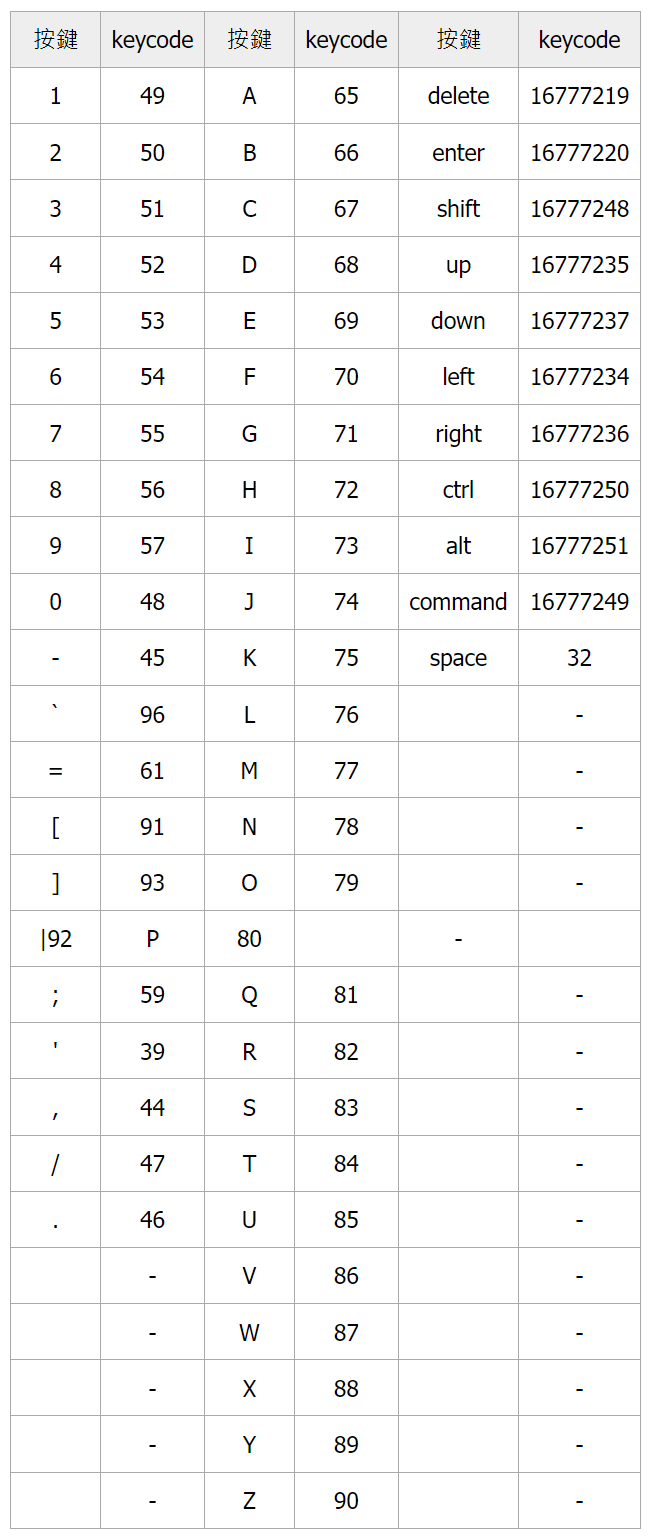

##### 偵測鍵盤快速鍵組合 
如果要偵測鍵盤的快速鍵組合 ( 熱鍵 )，例如 Ctrl+O、Ctrl+C...等，除了自己寫程式判斷，也可以載入 PyQt5.QtGui 的 QKeySequence 模組，\
搭配 QtWidgets.QShortcut() 方法，就可以偵測快速鍵，使用方法如下：

In [ ]:
shortcut = QtWidgets.QShortcut(QKeySequence("快速鍵組合"), Form)
shortcut.activated.connect(fn)
# Form 為主視窗元件
# 快速鍵組合例如 Ctrl+C、Alt+C...等，不可以有空格，不區分大小寫
# fn 為按下快速鍵組合要執行的函式

下方的程式碼執行後，當使用者按下快速鍵組合，就會透過 QLabel 顯示目前的快速鍵組合內容。

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import QKeySequence
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(0,0,100,30)

def ctrl_o():
    label.setText('Ctrl + O')

shortcut1 = QtWidgets.QShortcut(QKeySequence("Ctrl+O"), Form)  # 偵測 Ctrl + O
shortcut1.activated.connect(ctrl_o)

def alt_shift_c():
    label.setText('Alt + Shift + C')

shortcut2 = QtWidgets.QShortcut(QKeySequence("Alt+Shift+C"), Form)  # 偵測 Alt + Shift + C
shortcut2.activated.connect(alt_shift_c)


Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 从 PyQt5 包中导入 QtWidgets 模块，包含用于构建图形用户界面的类。
from PyQt5 import QtWidgets
# 导入 QKeySequence 类，用于处理键盘快捷键序列。
from PyQt5.QtGui import QKeySequence
import sys  # 导入 sys 模块，用于处理与 Python 解释器相关的操作，如命令行参数和程序退出。

# 定义一个名为 MyWidget 的类，继承自 QtWidgets.QWidget，这是 PyQt5 中所有窗口类型组件的基类。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用父类的构造函数，进行基本的窗口设置。
        self.setWindowTitle('oxxo.studio')  # 设置窗口的标题。
        self.resize(300, 200)  # 设置窗口的大小。
        self.ui()  # 调用自定义的 ui 方法来创建用户界面。

    # 定义一个名为 ui 的方法，用于设置窗口中的组件和布局。
    def ui(self):
        self.label = QtWidgets.QLabel(self)  # 创建一个 QLabel 对象作为文本显示。
        self.label.setGeometry(0, 0, 100, 30)  # 设置标签的位置和大小。

        # 创建一个快捷键，设置其快捷键序列为 "Ctrl+O"。
        self.shortcut1 = QtWidgets.QShortcut(QKeySequence("Ctrl+O"), self)
        self.shortcut1.activated.connect(self.ctrl_o)  # 将快捷键激活信号连接到 ctrl_o 方法。

        # 创建另一个快捷键，设置其快捷键序列为 "Alt+Shift+C"。
        self.shortcut2 = QtWidgets.QShortcut(QKeySequence("Alt+Shift+C"), self)
        self.shortcut2.activated.connect(self.alt_shift_c)  # 将快捷键激活信号连接到 alt_shift_c 方法。

    # 定义 ctrl_o 方法，当激活 "Ctrl+O" 快捷键时调用。
    def ctrl_o(self):
        self.label.setText('Ctrl + O')  # 更新标签文本。

    # 定义 alt_shift_c 方法，当激活 "Alt+Shift+C" 快捷键时调用。
    def alt_shift_c(self):
        self.label.setText('Alt + Shift + C')  # 更新标签文本。

# 程序的入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建一个应用程序实例。
    Form = MyWidget()  # 创建 MyWidget 类的实例。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 启动应用程序的事件循环，等待用户操作。